In [924]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.preprocessing import StandardScaler

import joblib

from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [925]:
df = pd.read_csv('./data/Summary of Weather.csv', index_col=False)

C:\Users\Mig\AppData\Local\Temp\ipykernel_12096\1802435556.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/Summary of Weather.csv', index_col=False)


**Prerequisites to do:**
1. get 3 variable data for regression problems

**To do:**
1. scale data
2. 

In [926]:
df

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [927]:
df.dtypes

STA              int64
Date            object
Precip          object
WindGustSpd    float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall        object
PoorWeather     object
YR               int64
MO               int64
DA               int64
PRCP            object
DR             float64
SPD            float64
MAX            float64
MIN            float64
MEA            float64
SNF             object
SND            float64
FT             float64
FB             float64
FTI            float64
ITH            float64
PGT            float64
TSHDSBRSGF      object
SD3            float64
RHX            float64
RHN            float64
RVG            float64
WTE            float64
dtype: object

In [928]:
df.describe(exclude='object')

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [929]:
df.describe(include='object')

,Date,Precip,Snowfall,PoorWeather,PRCP,SNF,TSHDSBRSGF
count,119040,119040,117877.0,34237,117108,117877.0,34237
unique,2192,540,42.0,39,540,42.0,39
top,1945-4-16,0,0.0,1,0,0.0,1
freq,122,64267,86090.0,25846,62335,86090.0,25846


In [930]:
# drop column only if "all" values are null or nan
# or instead drop column if most rows of column are null values
df.dropna(thresh=119000,axis=1, inplace=True)

In [931]:
df

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,YR,MO,DA
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,42,7,1
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,42,7,2
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,42,7,3
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,42,7,4
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,42,7,5
...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,28.333333,18.333333,23.333333,45,12,27
119036,82506,1945-12-28,9.906,29.444444,18.333333,23.888889,45,12,28
119037,82506,1945-12-29,0,28.333333,18.333333,23.333333,45,12,29
119038,82506,1945-12-30,0,28.333333,18.333333,23.333333,45,12,30


In [932]:
df.dtypes

STA           int64
Date         object
Precip       object
MaxTemp     float64
MinTemp     float64
MeanTemp    float64
YR            int64
MO            int64
DA            int64
dtype: object

* STA is station
* date is the day of a particular weather event
* precip is the precipitation rate. A T value in this column represents the daily amount of snowfall (in inches to the tenths). T indicates trace amount. Precipitation
* maxtemp is teh maximum temperature during that day
* mintemp is the minimum temp during that day
* meantemp is the average temperature during that day
* YR is the year of that day from 
* MO is the month of that day 1 to 12
* DA is the day of that day from 1 to 31

In [933]:
df.describe(exclude='object')

,STA,MaxTemp,MinTemp,MeanTemp,YR,MO,DA
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000
mean,29659.435795,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530
std,20953.209402,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541
min,10001.000000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000
25%,11801.000000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000
50%,22508.000000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000
75%,33501.000000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000
max,82506.000000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000


In [934]:
df.describe(include='object')

,Date,Precip
count,119040,119040
unique,2192,540
top,1945-4-16,0
freq,122,64267


In [935]:
df['Precip'].value_counts()

Precip
0          64267
T          16753
0.254       3389
0.508       2909
0.762       2015
           ...  
123.698        1
106.68         1
126.492        1
123.952        1
161.036        1
Name: count, Length: 540, dtype: int64

#### because precip has a T value we can model this dependent variable to instead be a numerical one. we can use -1 since there are no other values taking with this value

In [936]:
-1 in df['Precip']

False

In [937]:
df.loc[df['Precip'] == 'T', 'Precip']

6         T
8         T
15        T
16        T
17        T
         ..
119001    T
119006    T
119014    T
119018    T
119031    T
Name: Precip, Length: 16753, dtype: object

In [938]:
df.loc[df['Precip'] == 'T', 'Precip'] = "-1"

In [939]:
df['Precip'].value_counts()

Precip
0          64267
-1         16753
0.254       3389
0.508       2909
0.762       2015
           ...  
123.698        1
106.68         1
126.492        1
123.952        1
161.036        1
Name: count, Length: 540, dtype: int64

In [940]:
# then convert the Precip column to floats
df['Precip'] = df['Precip'].astype(float)

In [941]:
df.dtypes

STA           int64
Date         object
Precip      float64
MaxTemp     float64
MinTemp     float64
MeanTemp    float64
YR            int64
MO            int64
DA            int64
dtype: object

In [942]:
# check if value counts are still the same
df['Precip'].value_counts()

Precip
 0.000      64267
-1.000      16753
 0.254       3389
 0.508       2909
 0.762       2015
            ...  
 123.698        1
 106.680        1
 126.492        1
 123.952        1
 161.036        1
Name: count, Length: 540, dtype: int64

In [943]:
# it is imperative we split first before scaling or normalizing
# to prevent data leakage
X_trains, X_, Y_trains, Y_ = train_test_split(df[['MaxTemp', 'MinTemp']], df['Precip'], test_size=0.2, random_state=0)
X_cross, X_tests, Y_cross, Y_tests = train_test_split(X_, Y_, test_size=0.2, random_state=0)

In [944]:
X_trains

,MaxTemp,MinTemp
36004,27.222222,22.222222
116838,32.777778,17.777778
46809,8.888889,-9.444444
109656,31.666667,22.222222
61397,35.000000,18.888889
...,...,...
45891,5.000000,-1.666667
117952,32.222222,19.444444
42613,4.444444,3.333333
43567,14.444444,10.000000


In [945]:
Y_trains

36004      0.000
116838     0.000
46809      0.000
109656    20.320
61397      0.000
           ...  
45891      2.540
117952     0.000
42613      0.000
43567     -1.000
68268      2.032
Name: Precip, Length: 95232, dtype: float64

In [946]:
model = LinearRegression()
model.fit(X_trains, Y_trains)
Y_preds = model.predict(X_trains)
print(mean_squared_error(Y_trains, Y_preds))
print(model.score(X_trains, Y_trains))

115.63254639675812
0.029684890686039522


In [947]:
model2 = SGDRegressor()
model2.fit(X_trains, Y_trains)
print(model2.score(X_trains, Y_trains))

0.026061492331394542


In [948]:
def plot_data(X_trains, X_tests, versus: list=[0, 1], img_title: str=None):
    """
    args:
        versus - indicates the indeces of the two columns/variables/features to compare
    """
    f1 = versus[0]
    f2 = versus[1]

    fig = plt.figure(figsize=(15, 10))
    axis = fig.add_subplot()

    axis.scatter(X_trains[:, f1], X_trains[:, f2], alpha=0.25, c='#4248f5', marker='p', label='training data')
    axis.scatter(X_tests[:, f1], X_tests[:, f2], alpha=0.25, c='#f542a1', marker='.', label='test data')

    if img_title is not None:
        plt.savefig(f'./figures & images/{img_title}.png')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(img_title)
    plt.legend()
    plt.show()

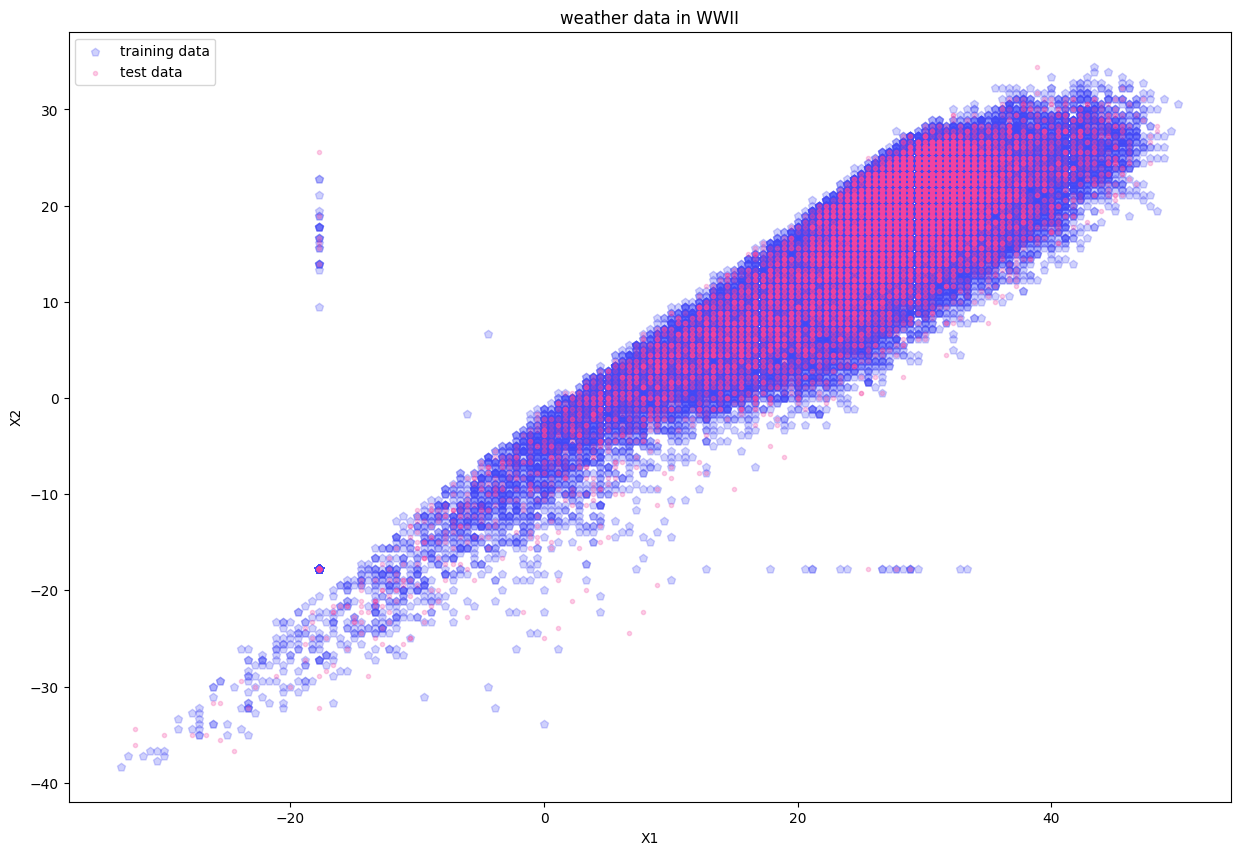

In [949]:
plot_data(
    X_trains=X_trains.to_numpy(), 
    X_tests=X_cross.to_numpy(), 
    versus=[0, 1], 
    img_title='weather data in WWII')

In [950]:
train_scaler = StandardScaler()

# fit partially performs operation of normalization
# by computing mean and standard deviation of column/s
train_scaler.fit(X_trains)

# now having used .fit() as a prerequisite in order to have
# the object store the mean and standard deviation of the column/s
# we can now perform .transform() of our dataset with these information
# in order for it to return our newly normalized/scaled data
X_trains_normed = train_scaler.transform(X_trains)

In [951]:
train_scaler.mean_


array([27.0432791 , 17.79932166])

In [952]:
train_scaler.scale_

array([8.72237499, 8.33080108])

In [953]:
cross_scaler = StandardScaler()
cross_scaler.fit(X_cross)
X_cross_normed = cross_scaler.transform(X_cross)

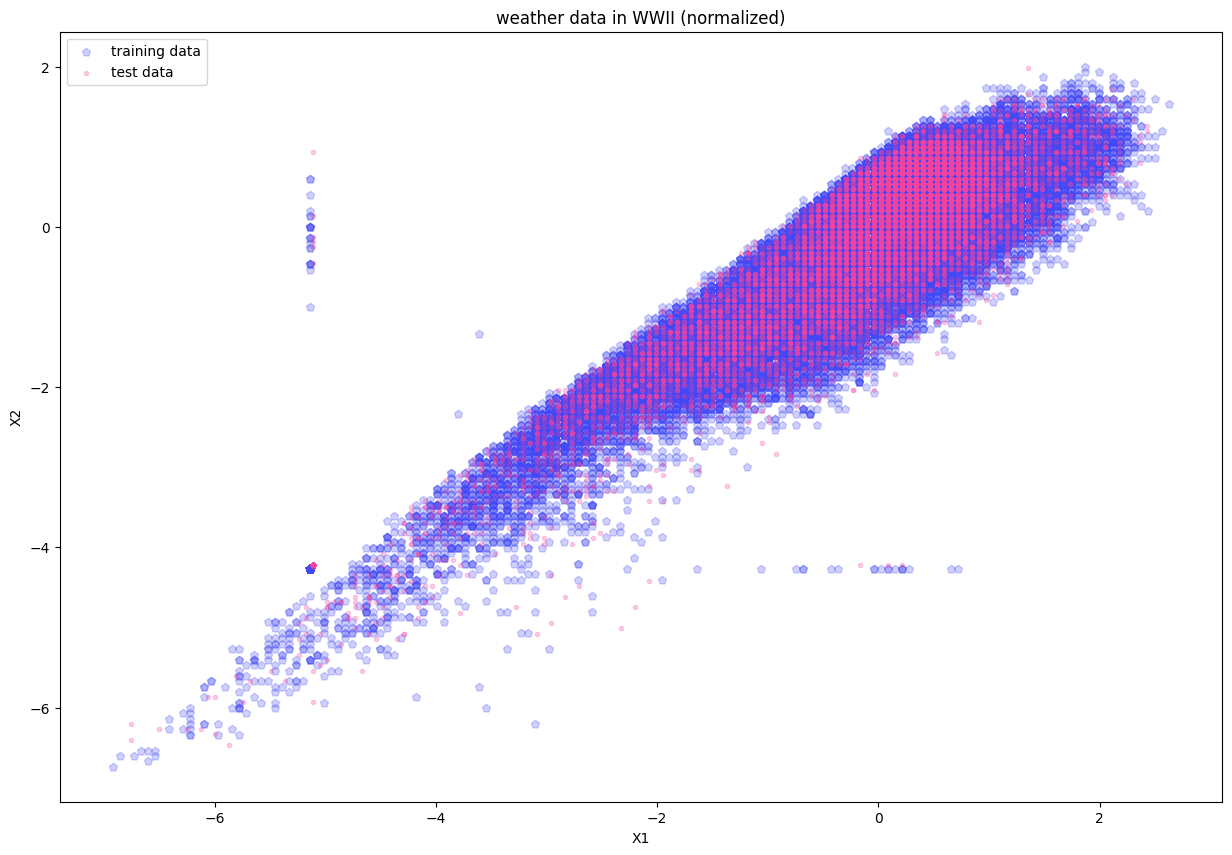

In [954]:
plot_data(
    X_trains=X_trains_normed, 
    X_tests=X_cross_normed, 
    versus=[0, 1], 
    img_title='weather data in WWII (normalized)')

In [955]:
X_trains_normed.max()

2.631934641103974

In [956]:
X_trains_normed.min()

-6.922038146899576

In [957]:
lrm_a = LinearRegression()
lrm_b = Ridge(alpha=0.9)

lrm_a.fit(X_trains_normed, Y_trains)
lrm_b.fit(X_trains_normed, Y_trains)

Ridge(alpha=0.9)

In [958]:
# get results of training data
Y_train_preds = lrm_a.predict(X_trains_normed)
print(f"mean squared error for training data: {mean_squared_error(Y_trains, Y_train_preds)}")
print(f"root mean squared error for training data: {math.sqrt(mean_squared_error(Y_trains, Y_train_preds))}")

# get results of cross data
Y_cross_preds = lrm_a.predict(X_cross_normed)
print(f"mean squared error for test data: {mean_squared_error(Y_cross, Y_cross_preds)}")
print(f"root mean squared error for test data: {math.sqrt(mean_squared_error(Y_cross, Y_cross_preds))}")

mean squared error for training data: 115.63254639675812
root mean squared error for training data: 10.753257478399656
mean squared error for test data: 109.43889111379009
root mean squared error for test data: 10.461304465208443


In [959]:
# get results of training data
Y_train_preds = lrm_b.predict(X_trains_normed)
print(f"mean squared error for training data: {mean_squared_error(Y_trains, Y_train_preds)}")
print(f"root mean squared error for training data: {math.sqrt(mean_squared_error(Y_trains, Y_train_preds))}")

# get results of cross data
Y_cross_preds = lrm_b.predict(X_cross_normed)
print(f"mean squared error for test data: {mean_squared_error(Y_cross, Y_cross_preds)}")
print(f"root mean squared error for test data: {math.sqrt(mean_squared_error(Y_cross, Y_cross_preds))}")

mean squared error for training data: 115.63254641663356
root mean squared error for training data: 10.753257479323814
mean squared error for test data: 109.43887284891879
root mean squared error for test data: 10.461303592235472


In [960]:
lrm_a.score(X_trains_normed, Y_trains)

0.029684890686039522

In [961]:
Y_cross

82939     0.000
22832     0.000
17333     0.000
51201     0.254
36869    15.748
          ...  
5805      3.810
35465     0.000
14362    -1.000
10567     5.334
9221      2.286
Name: Precip, Length: 19046, dtype: float64

In [962]:
Y_cross_preds

array([-4.9289857 ,  6.03377577,  1.56389838, ...,  4.38188946,
        3.7466663 ,  4.51718977])

#### See the learned weights/parameters/coefficients of boht linear models

In [963]:
lrm_a.coef_

array([-3.39491721,  3.94212605])

In [964]:
lrm_a.intercept_

3.0863902049731156

In [965]:
lrm_b.coef_

array([-3.39463203,  3.94183811])

In [966]:
lrm_b.intercept_

3.0863902049731156

# Save model for testing

In [967]:
joblib.dump(lrm_a, './models/lrm_a.pkl')

['./models/lrm_a.pkl']

In [968]:
# export testing set for testing
type(X_tests)

pandas.core.frame.DataFrame

In [969]:
X_tests.shape

(4762, 2)

In [970]:
Y_tests

75930    0.000
68590    0.000
79859    0.000
70258    0.000
65025    0.000
         ...  
68705    0.000
47011    0.000
66768    0.000
57257    0.000
41893    0.254
Name: Precip, Length: 4762, dtype: float64

In [971]:
A = Y_tests.to_numpy()
A.shape

(4762,)

In [972]:
A_exp = A.reshape(-1, 1)

In [973]:
test_data = np.concatenate([X_tests, A_exp], axis=1)

In [974]:
np.savetxt('./data/test_data.txt', test_data, delimiter='\t', fmt='%.4f')